In [1]:
# Import the necessary modules
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
RANDOM_SEED = 42

Using Theano backend.


In [3]:
import os
os.chdir('C:\\Users\\welcome\\Downloads\\20170902-batch29-cse7321c-denoising-autoencoder-kirankumarpatro-master')

In [4]:
# Read the data drom csv file
test = np.genfromtxt('testR.csv', delimiter=",")
train = np.genfromtxt('trainR.csv', delimiter=',')

In [5]:
x_train_1d = train[:,0:784]
y_train = train[:,784]

x_test_1d = test[:,0:784]
y_test = test[:,784]

x_train = x_train_1d.astype('float32') / 255.
x_test = x_test_1d.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(60000L, 784L)
(10000L, 784L)


In [6]:
noise_factor = 0.5
np.random.seed(9001)
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
np.random.seed(9001)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Remember that after normalizing, the range of pixel values is between 0-1? So after adding noise, 
# we restrict the values to be between 0-1 by clipping them.
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [7]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s - loss: 0.3438 - val_loss: 0.3074
Epoch 2/25
60000/60000 [==============================] - 9s - loss: 0.2671 - val_loss: 0.2980
Epoch 3/25
60000/60000 [==============================] - 9s - loss: 0.2642 - val_loss: 0.2920
Epoch 4/25
60000/60000 [==============================] - 9s - loss: 0.2592 - val_loss: 0.2824
Epoch 5/25
60000/60000 [==============================] - 9s - loss: 0.2494 - val_loss: 0.2696
Epoch 6/25
60000/60000 [==============================] - 9s - loss: 0.2359 - val_loss: 0.2593
Epoch 7/25
60000/60000 [==============================] - 9s - loss: 0.2230 - val_loss: 0.2563
Epoch 8/25
60000/60000 [==============================] - 9s - loss: 0.2127 - val_loss: 0.2577
Epoch 9/25
60000/60000 [==============================] - 9s - loss: 0.2047 - val_loss: 0.2629
Epoch 10/25
60000/60000 [==============================] - 9s - loss: 0.1984 - val_loss: 0.2710

In [10]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

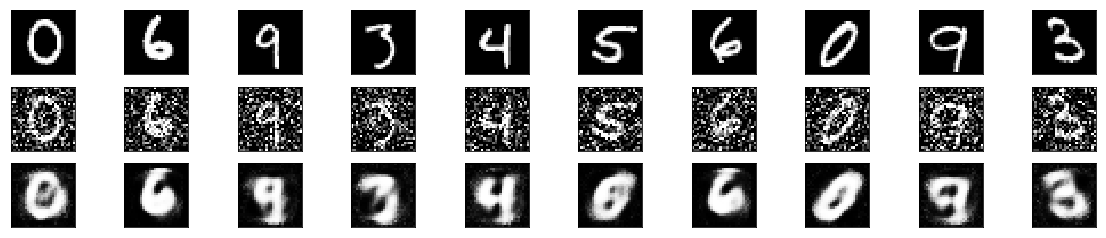

In [12]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
np.random.seed(80)
n = 10  # how many digits we will display
s = np.random.choice(range(x_test.shape[0]), 10)
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[s[i-1]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display noisy data
    ax = plt.subplot(3, n, n+i)
    plt.imshow(x_test_noisy[s[i-1]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + n +n)
    plt.imshow(decoded_imgs[s[i-1]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [13]:
# Shape of encoded and decoded images
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000L, 32L)
(10000L, 784L)


In [14]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout

In [16]:
model = Sequential()

model.add(Dense(200, input_dim = 784, init='uniform', activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100, init='uniform', activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, init='uniform', activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, batch_size=64, nb_epoch=10)

Epoch 1/10
60000/60000 [==============================] - 6s - loss: 0.3790 - acc: 0.8866     - ETA: 0s - loss: 0.
Epoch 2/10
60000/60000 [==============================] - 7s - loss: 0.1561 - acc: 0.9538     - ETA: 0s - loss: 0.1565 - acc: 0. - ETA: 0s - loss: 0.1562
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 0.1142 - acc: 0.9657     
Epoch 4/10
60000/60000 [==============================] - 7s - loss: 0.0936 - acc: 0.9709     
Epoch 5/10
60000/60000 [==============================] - 7s - loss: 0.0763 - acc: 0.9760     
Epoch 6/10
60000/60000 [==============================] - 7s - loss: 0.0659 - acc: 0.9787     
Epoch 7/10
60000/60000 [==============================] - 7s - loss: 0.0587 - acc: 0.9813     
Epoch 8/10
60000/60000 [==============================] - ETA: 0s - loss: 0.0533 - acc: 0.983 - 7s - loss: 0.0532 - acc: 0.9832     
Epoch 9/10
60000/60000 [==============================] - 8s - loss: 0.0465 - acc: 0.9850     
Epoch 10/10
60000/60000 [===

In [19]:
score = model.evaluate(x_test, y_test)
print(score)

10000/10000 [==============================] - 0s     
[0.063219373515178451, 0.98140000000000005]


In [20]:
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

In [21]:
model2 = Sequential()

model2.add(Dense(16, input_dim = 32, init='uniform', activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, init='uniform', activation='softmax'))

In [22]:
model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [23]:
model2.fit(x_train_encoded, y_train, batch_size=64, nb_epoch=10)

Epoch 1/10
60000/60000 [==============================] - 0s - loss: 1.0605 - acc: 0.6484     
Epoch 2/10
60000/60000 [==============================] - 0s - loss: 0.7437 - acc: 0.7561     
Epoch 3/10
60000/60000 [==============================] - 0s - loss: 0.6783 - acc: 0.7777     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.6473 - acc: 0.7914     
Epoch 5/10
60000/60000 [==============================] - 0s - loss: 0.6283 - acc: 0.7967     
Epoch 6/10
60000/60000 [==============================] - 0s - loss: 0.6161 - acc: 0.8004     
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.6061 - acc: 0.8043     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 0.5993 - acc: 0.8056     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 0.5970 - acc: 0.8083     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.5904 - acc: 0.8088     


In [24]:
score2 = model2.evaluate(x_test_encoded, y_test)
print(score2)

 9600/10000 [===========================>..] - ETA: 0s[0.38150703916549683, 0.8901]
